### Lead Scoring Case Study 

- Supervised Learning Algorithm - Logistic Regression [ Classification ]
- Programming Language - Python
- Developed by UV, VK, VY


#### Data Preprocessing

In [1]:
# import all libraries numpy, pandas, matplotlib, seaborn. 
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme(color_codes=True)

import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
%matplotlib inline

# Set custom display properties in pandas
pd.set_option("display.max_rows", 900)
pd.set_option("display.max_columns", 900) 
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
# To distinguish numerical columns either as categorical/discrete or non categorical and return as dict
def classify_feature_dtype(df,cols):
    d_categories = {'int_cat': [], "float_ts":[] }
    for col in cols:
        if (len(df[col].unique()) < 20):
            d_categories['int_cat'].append(col)
        else:
            d_categories['float_ts'].append(col)
    return d_categories

# Print all statistical information for a given set of columns
def show_stats(df, cols):
    for col in list(cols):
        print("Total Nulls: {0},\nMode: {1}".format(df[col].isna().sum(), df[col].mode()[0]))
        if len(df[col].unique()) < 50:
            print("\nUnique: {0}\n".format(df[col].unique()))
        if (df[col].dtype == int) or (df[col].dtype == float):
            print("Median   : {0}, \nVariance: {1}, \n\nDescribe: {2} \n".format(df[col].median(), df[col].var(), df[col].describe()))
        print("ValueCounts: {0} \n\n\n".format((df[col].value_counts(normalize=True) * 100).head(5)))
        print("------------------------------------------------------------------")

# Return the percentage of null values in each columns in a dataframe
def check_cols_null_pct(df):
    df_non_na = df.count() / len(df)  # Ratio of non null values
    df_na_pct = (1 - df_non_na) * 100 # Find the Percentage of null values
    return df_na_pct.sort_values(ascending=False) # Sort the resulting values in descending order

# Generates charts based on the data type of the cols, as part of the univariate analysis 
# it takes dataframe, columns, train data 0,1, and feature type as args.
def univariate_plots(df, cols, target=None, ftype=None, l_dict = None):
    for col in cols:
        #generate plots and graphs for category type. (generates piechart, countplot, boxplot / if training data is provided it generates bar chart instead)
        if ftype == "categorical":
            fig, axs = plt.subplots(1, 3, figsize=(20, 6))
                        
            col_idx = 0
            axs[col_idx].pie(x=df[col].value_counts().head(15), labels=df[col].value_counts().head(15).index.str[:15], autopct="%1.1f%%", 
                    radius=1, textprops={"fontsize": 10, "color": "Black"}, startangle=90, rotatelabels=False)
            axs[col_idx].set_title("PieChart of {0}".format(col), y=1); plt.xticks(rotation=45); plt.ylabel("Percentage")
            fig.subplots_adjust(wspace=0.5, hspace=0.3)
            
            col_idx += 1
            sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette="viridis",  ax=axs[col_idx])
            if (l_dict is not None) and (l_dict.get(col) is not None):
                axs[col_idx].legend([ f'{k} - {v}' for k,v in l_dict[col].items()])
            axs[col_idx].set_title("Countplot of {0}".format(col)); plt.xticks(rotation=45); plt.xlabel(col); plt.ylabel("Count")
            fig.subplots_adjust(wspace=0.5, hspace=0.3)

            col_idx += 1
            ax = sns.barplot(data=df, x=df[col].str[:15], y=target, palette="viridis",  ax=axs[col_idx], errwidth=0)
            for i in ax.containers:
                ax.bar_label(i,)
            axs[col_idx].set_title('Barplot against target'); plt.xticks(rotation=45); plt.xlabel(col)
            fig.subplots_adjust(wspace=0.5, hspace=0.3)

            plt.suptitle("Univariate analysis of {0}".format(col), fontsize=12, y=0.95)
            plt.tight_layout()
            plt.subplots_adjust(top=0.85)
            plt.show()
            plt.clf()

        #generate plots and graphs for numerical types. (generates boxplot, histplot, kdeplot, scatterplot)
        elif ftype == "non_categorical":        
            fig, axs = plt.subplots(1, 4, figsize=(20, 6))
            
            col_idx = 0
            
            sns.boxplot(data=df, y=col, palette="viridis", flierprops=dict( marker="o", markersize=6, markerfacecolor="red", markeredgecolor="black"),
                        medianprops=dict(linestyle="-", linewidth=3, color="#FF9900"), whiskerprops=dict(linestyle="-", linewidth=2, color="black"),
                        capprops=dict(linestyle="-", linewidth=2, color="black"), ax=axs[col_idx])
            axs[col_idx].set_title("Boxplot of {0}".format(col)); plt.xticks(rotation=45); plt.xlabel(col)
            fig.subplots_adjust(wspace=0.5, hspace=0.3)
            
            col_idx += 1

            axs[col_idx].hist(data=df, x=col, label=col)
            axs[col_idx].set_title("Histogram of {0}".format(col)); plt.xticks(rotation=45); plt.xlabel(col)
            fig.subplots_adjust(wspace=0.5, hspace=0.3)
            
            col_idx += 1

            sns.kdeplot(df[col], shade=True, ax=axs[col_idx])
            axs[col_idx].set_title("KDE plot of {0}".format(col)); plt.xticks(rotation=45); plt.xlabel(col)
            fig.subplots_adjust(wspace=0.5, hspace=0.3)
            
            col_idx += 1

            sns.scatterplot(df[col], ax=axs[col_idx])
            axs[col_idx].set_title("Scatterplot of {0}".format(col)); plt.xticks(rotation=45); plt.xlabel(col)
            fig.subplots_adjust(wspace=0.5, hspace=0.3)

            plt.suptitle("Univariate analysis of {0}".format(col), fontsize=12, y=0.95)
            plt.tight_layout()
            plt.subplots_adjust(top=0.85)
            plt.show()
            plt.clf()

# Perform Outlier analysis on the given dataframe.
# Find Lower threshold, Upper threshold and IQR values. 
# Return the Result as a dataframe. 
# find_outlier = True argument: restricts the output df to outlier columns. whereas find_outlier = False: returns results for all columns
def get_extremeval_threshld(df, find_outlier=False):
    outlier_df = pd.DataFrame(columns=[i for i in df.columns if find_outlier == True], data=None)
    
    for col in df.columns:
        thirdq, firstq = df[col].quantile(0.75), df[col].quantile(0.25)
        iqr = 1.5 * (thirdq - firstq)
        extvalhigh, extvallow = iqr + thirdq, firstq - iqr
        
        if find_outlier == True:
            dfout = df.loc[(df[col] > extvalhigh) | (df[col] < extvallow)]
            dfout = dfout.assign(name=col, thresh_low=extvallow, thresh_high=extvalhigh)
        else:
            dfout = pd.DataFrame([[col, extvallow, extvalhigh]], columns=['name', 'thresh_low', 'thresh_high'])
            
        outlier_df = pd.concat([outlier_df, dfout])
    # outlier_df = outlier_df.reset_index(drop=True)
    outlier_df = outlier_df.set_index('name',drop=True)
    return outlier_df

In [3]:
df = pd.read_csv('Leads.csv')
df.head(1)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.000,0,0.000,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.000,15.000,No,No,Modified


In [4]:
#convert dtypes 
obj_cols = df.select_dtypes(include=object).columns
df[obj_cols] = df[obj_cols].astype(dtype='category')

In [5]:
#duplicates row validation by id cols
print(f"{df.index.is_unique}, {df.columns.is_unique}, {df['Prospect ID'].is_unique}, {df['Lead Number'].is_unique}")

True, True, True, True


In [6]:
#drop unnecessary columns
df = df.drop(columns=['Prospect ID', 'I agree to pay the amount through cheque', 'Last Notable Activity'])

In [7]:
#rename columns that are too long
df = df.rename(columns={'Total Time Spent on Website':'ttime_on_site', 'Page Views Per Visit':'pg_view_pv', 'How did you hear about X Education':'info_abt_X_Edu', 'What is your current occupation':'curr_occupation',
    'What matters most to you in choosing a course':'reason_behind_course', 'Receive More Updates About Our Courses':'more_course_updates', 'Update me on Supply Chain Content':'supply_chain_info', 'Get updates on DM Content':'get_dm',
    'Asymmetrique Activity Index':'asym_activ_idx', 'Asymmetrique Profile Index':'asym_prof_idx', 'Asymmetrique Activity Score':'asym_activ_score', 'Asymmetrique Profile Score':'asym_prof_score',
    'A free copy of Mastering The Interview':'avail_free_copy'})

In [8]:
# replace unnecessary space in columns with underscore and covert it to lower case
df.columns = df.columns.str.replace(pat=' ',repl='_', regex=True)
df.columns = df.columns.str.lower()

In [9]:
df.head(1)
print(f'{df.shape},{df.size}')
df.dtypes

,lead_number,lead_origin,lead_source,do_not_email,do_not_call,converted,totalvisits,ttime_on_site,pg_view_pv,last_activity,country,specialization,info_abt_x_edu,curr_occupation,reason_behind_course,search,magazine,newspaper_article,x_education_forums,newspaper,digital_advertisement,through_recommendations,more_course_updates,tags,lead_quality,supply_chain_info,get_dm,lead_profile,city,asym_activ_idx,asym_prof_idx,asym_activ_score,asym_prof_score,avail_free_copy
0,660737,API,Olark Chat,No,No,0,0.000,0,0.000,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.000,15.000,No


(9240, 34),314160


lead_number                   int64
lead_origin                category
lead_source                category
do_not_email               category
do_not_call                category
converted                     int64
totalvisits                 float64
ttime_on_site                 int64
pg_view_pv                  float64
last_activity              category
country                    category
specialization             category
info_abt_x_edu             category
curr_occupation            category
reason_behind_course       category
search                     category
magazine                   category
newspaper_article          category
x_education_forums         category
newspaper                  category
digital_advertisement      category
through_recommendations    category
more_course_updates        category
tags                       category
lead_quality               category
supply_chain_info          category
get_dm                     category
lead_profile               c

In [53]:
#check null val percentage
100*df.isna().sum()/len(df)

lead_number             0.000
lead_origin             0.000
lead_source             0.390
do_not_email            0.000
converted               0.000
totalvisits             1.483
ttime_on_site           0.000
pg_view_pv              1.483
last_activity           1.115
country                 0.000
specialization         36.580
curr_occupation         0.000
reason_behind_course    0.000
tags                   36.288
city                    0.000
avail_free_copy         0.000
dtype: float64

specialization         36.580
tags                   36.288
totalvisits             1.483
pg_view_pv              1.483
last_activity           1.115
lead_source             0.390
lead_number             0.000
lead_origin             0.000
do_not_email            0.000
converted               0.000
ttime_on_site           0.000
country                 0.000
curr_occupation         0.000
reason_behind_course    0.000
city                    0.000
avail_free_copy         0.000
dtype: float64

In [11]:
#replace select string with nan
df = df.replace(to_replace=['select','Select'],value=np.nan)
# validate select str is replaced
[i for i in df.columns if 'select' in (df[i].astype(str).str.lower()).str.findall('select').value_counts().index.map(''.join).to_list()]


[]

In [12]:
from fast_ml.utilities import display_all
from fast_ml.feature_selection import get_constant_features

constant_features = get_constant_features(df)
constant_features.head(10)
"','".join(constant_features['Var'].to_list())

,Desc,Var,Value,Perc
0,Constant,magazine,No,100.000
1,Constant,more_course_updates,No,100.000
2,Constant,supply_chain_info,No,100.000
3,Constant,get_dm,No,100.000
4,Quasi Constant,x_education_forums,No,99.989
5,Quasi Constant,newspaper,No,99.989
6,Quasi Constant,do_not_call,No,99.978
7,Quasi Constant,newspaper_article,No,99.978
8,Quasi Constant,digital_advertisement,No,99.957
9,Quasi Constant,through_recommendations,No,99.924


"magazine','more_course_updates','supply_chain_info','get_dm','x_education_forums','newspaper','do_not_call','newspaper_article','digital_advertisement','through_recommendations','search"

In [13]:
df = df.drop(['magazine','more_course_updates','supply_chain_info','get_dm','x_education_forums','newspaper','do_not_call','newspaper_article','digital_advertisement','through_recommendations','search'],axis=1)

In [14]:
#check null val percentage
null_pct = 100*df.isna().sum()/len(df)
null_pct
df = df.drop(null_pct[null_pct > 40].index, axis=1)

lead_number             0.000
lead_origin             0.000
lead_source             0.390
do_not_email            0.000
converted               0.000
totalvisits             1.483
ttime_on_site           0.000
pg_view_pv              1.483
last_activity           1.115
country                26.634
specialization         36.580
info_abt_x_edu         78.463
curr_occupation        29.113
reason_behind_course   29.318
tags                   36.288
lead_quality           51.591
lead_profile           74.188
city                   39.708
asym_activ_idx         45.649
asym_prof_idx          45.649
asym_activ_score       45.649
asym_prof_score        45.649
avail_free_copy         0.000
dtype: float64

In [15]:
null_pct = 100*df.isna().sum()/len(df)
null_pct
na_cols = null_pct[null_pct > 0].index
na_cols

lead_number             0.000
lead_origin             0.000
lead_source             0.390
do_not_email            0.000
converted               0.000
totalvisits             1.483
ttime_on_site           0.000
pg_view_pv              1.483
last_activity           1.115
country                26.634
specialization         36.580
curr_occupation        29.113
reason_behind_course   29.318
tags                   36.288
city                   39.708
avail_free_copy         0.000
dtype: float64

Index(['lead_source', 'totalvisits', 'pg_view_pv', 'last_activity', 'country',
       'specialization', 'curr_occupation', 'reason_behind_course', 'tags',
       'city'],
      dtype='object')

In [16]:
df.describe(include=np.number)
df.describe(exclude=np.number)

,lead_number,converted,totalvisits,ttime_on_site,pg_view_pv
count,9240.000,9240.000,9103.000,9240.000,9103.000
mean,617188.436,0.385,3.445,487.698,2.363
std,23405.996,0.487,4.855,548.021,2.161
min,579533.000,0.000,0.000,0.000,0.000
25%,596484.500,0.000,1.000,12.000,1.000
50%,615479.000,0.000,3.000,248.000,2.000
75%,637387.250,1.000,5.000,936.000,3.000
max,660737.000,1.000,251.000,2272.000,55.000


,lead_origin,lead_source,do_not_email,last_activity,country,specialization,curr_occupation,reason_behind_course,tags,city,avail_free_copy
count,9240,9204,9240,9137,6779,5860,6550,6531,5887,5571,9240
unique,5,21,2,17,38,18,6,3,26,6,2
top,Landing Page Submission,Google,No,Email Opened,India,Finance Management,Unemployed,Better Career Prospects,Will revert after reading the email,Mumbai,No
freq,4886,2868,8506,3437,6492,976,5600,6528,2072,3222,6352


In [17]:
# impute missing categorical values using mode, if a particular value in that column has higher frequency say > 50%
for i in df.select_dtypes(include='category'):
    temp = df[i].value_counts(normalize=True, ascending=False)*100
    if temp.iloc[0] > 50:
        df[i] = df[i].fillna(temp.index[0])

In [18]:
null_pct = 100*df.isna().sum()/len(df)
null_pct
null_pct[null_pct > 0]

lead_number             0.000
lead_origin             0.000
lead_source             0.390
do_not_email            0.000
converted               0.000
totalvisits             1.483
ttime_on_site           0.000
pg_view_pv              1.483
last_activity           1.115
country                 0.000
specialization         36.580
curr_occupation         0.000
reason_behind_course    0.000
tags                   36.288
city                    0.000
avail_free_copy         0.000
dtype: float64

lead_source       0.390
totalvisits       1.483
pg_view_pv        1.483
last_activity     1.115
specialization   36.580
tags             36.288
dtype: float64

- lead_source       0.390
- totalvisits       1.483
- pg_view_pv        1.483
- last_activity     1.115
- specialization   36.580
- tags             36.288

#### Custom Code to be removed !!!!!!

In [19]:
100*(df.isna().sum()/len(df))
dff = df[(df.notna()).all(axis=1)]
100*dff.isna().sum()

lead_number             0.000
lead_origin             0.000
lead_source             0.390
do_not_email            0.000
converted               0.000
totalvisits             1.483
ttime_on_site           0.000
pg_view_pv              1.483
last_activity           1.115
country                 0.000
specialization         36.580
curr_occupation         0.000
reason_behind_course    0.000
tags                   36.288
city                    0.000
avail_free_copy         0.000
dtype: float64

lead_number             0
lead_origin             0
lead_source             0
do_not_email            0
converted               0
totalvisits             0
ttime_on_site           0
pg_view_pv              0
last_activity           0
country                 0
specialization          0
curr_occupation         0
reason_behind_course    0
tags                    0
city                    0
avail_free_copy         0
dtype: int64

In [20]:
sorted([f'{i} - {dff[i].unique()}' for i in dff.columns])

["avail_free_copy - ['Yes', 'No']\nCategories (2, object): ['No', 'Yes']",
 "city - ['Mumbai', 'Other Metro Cities', 'Thane & Outskirts', 'Other Cities', 'Other Cities of Maharashtra', 'Tier II Cities']\nCategories (6, object): ['Mumbai', 'Other Cities', 'Other Cities of Maharashtra', 'Other Metro Cities', 'Thane & Outskirts', 'Tier II Cities']",
 'converted - [1 0]',
 "country - ['India', 'Oman', 'United States', 'Bahrain', 'United Kingdom', ..., 'Denmark', 'Philippines', 'Vietnam', 'Indonesia', 'Bangladesh']\nLength: 30\nCategories (38, object): ['Asia/Pacific Region', 'Australia', 'Bahrain', 'Bangladesh', ..., 'United Kingdom', 'United States', 'Vietnam', 'unknown']",
 "curr_occupation - ['Student', 'Unemployed', 'Working Professional', 'Businessman', 'Other', 'Housewife']\nCategories (6, object): ['Businessman', 'Housewife', 'Other', 'Student', 'Unemployed', 'Working Professional']",
 "do_not_email - ['No', 'Yes']\nCategories (2, object): ['No', 'Yes']",
 "last_activity - ['Email O

In [22]:
dff.shape

(4368, 16)

#### Data Visualization

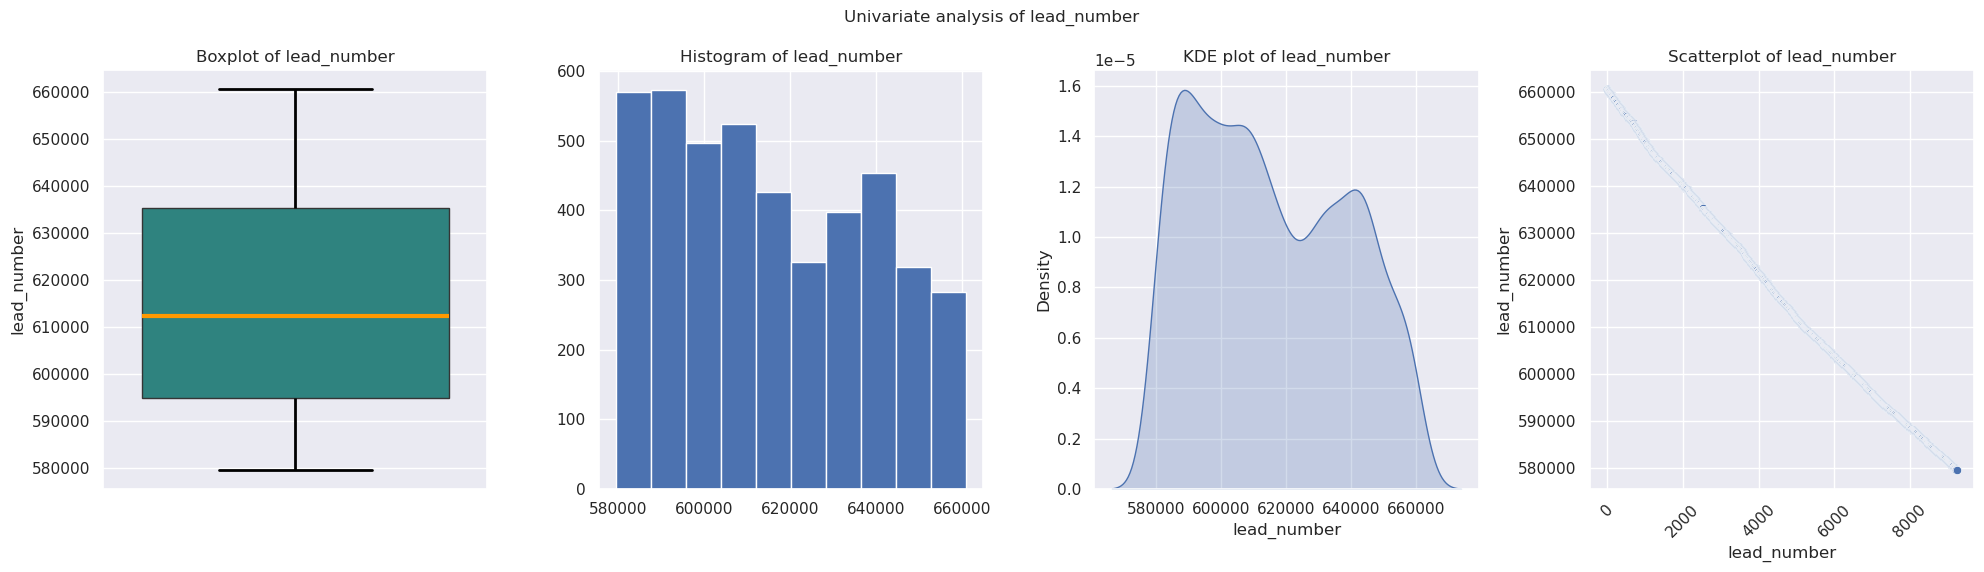

<Figure size 640x480 with 0 Axes>

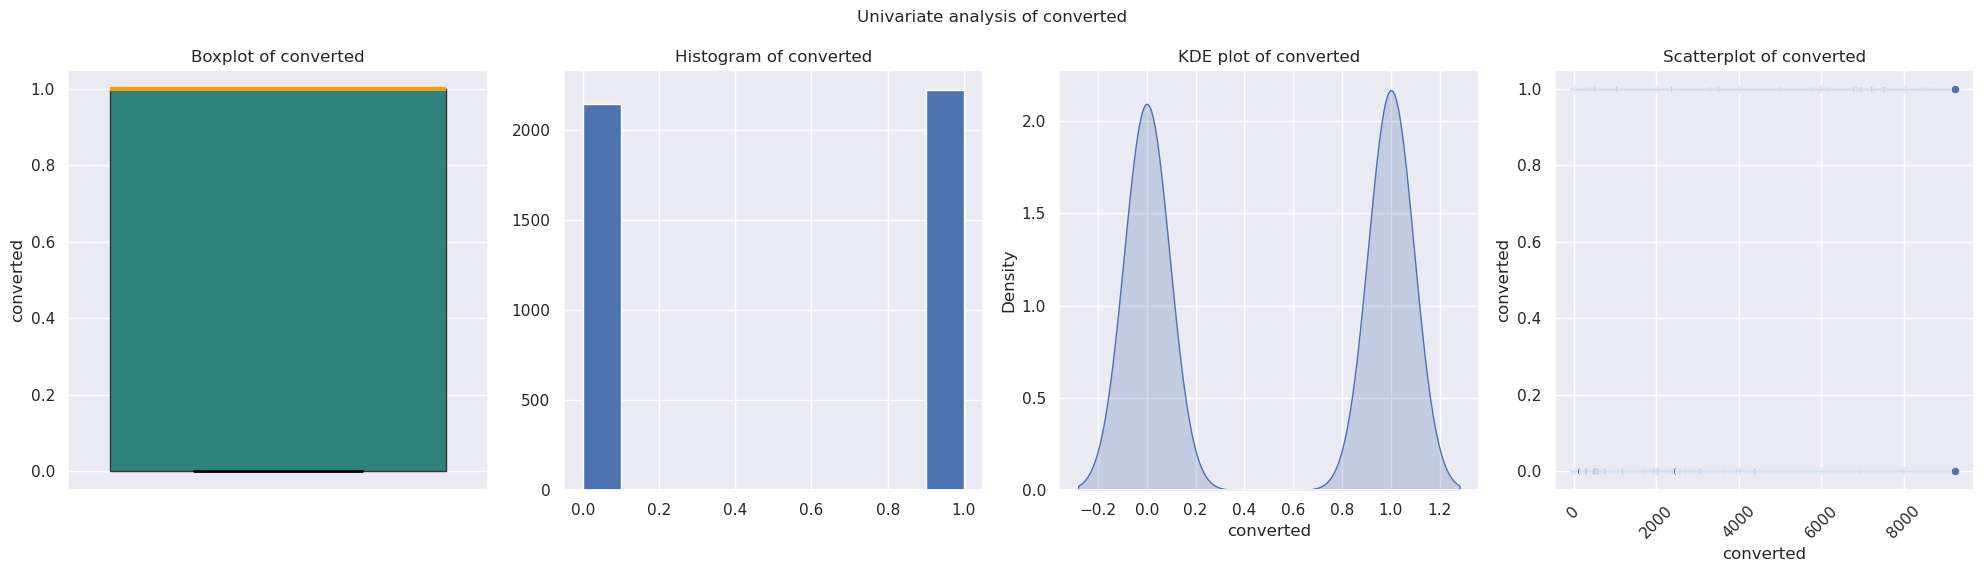

<Figure size 640x480 with 0 Axes>

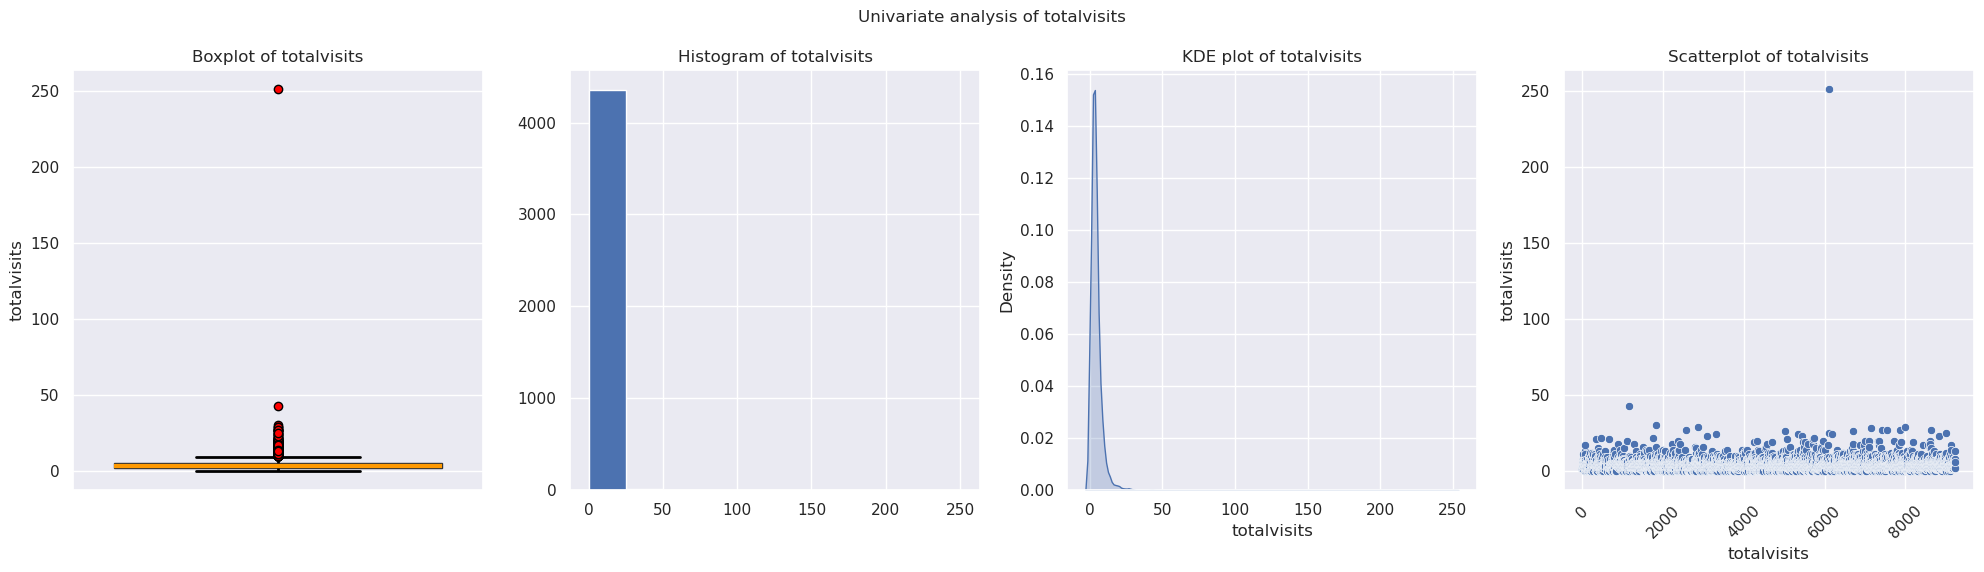

<Figure size 640x480 with 0 Axes>

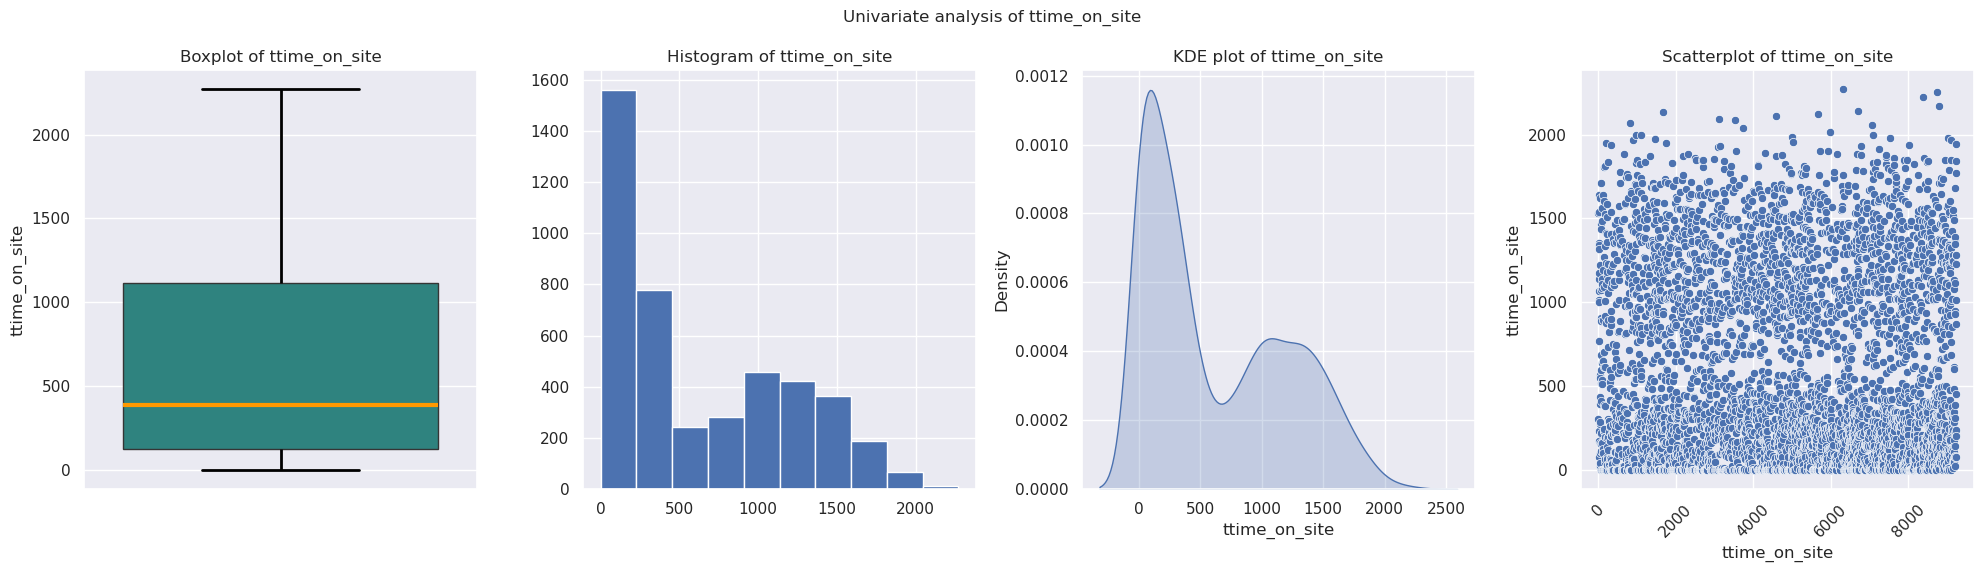

<Figure size 640x480 with 0 Axes>

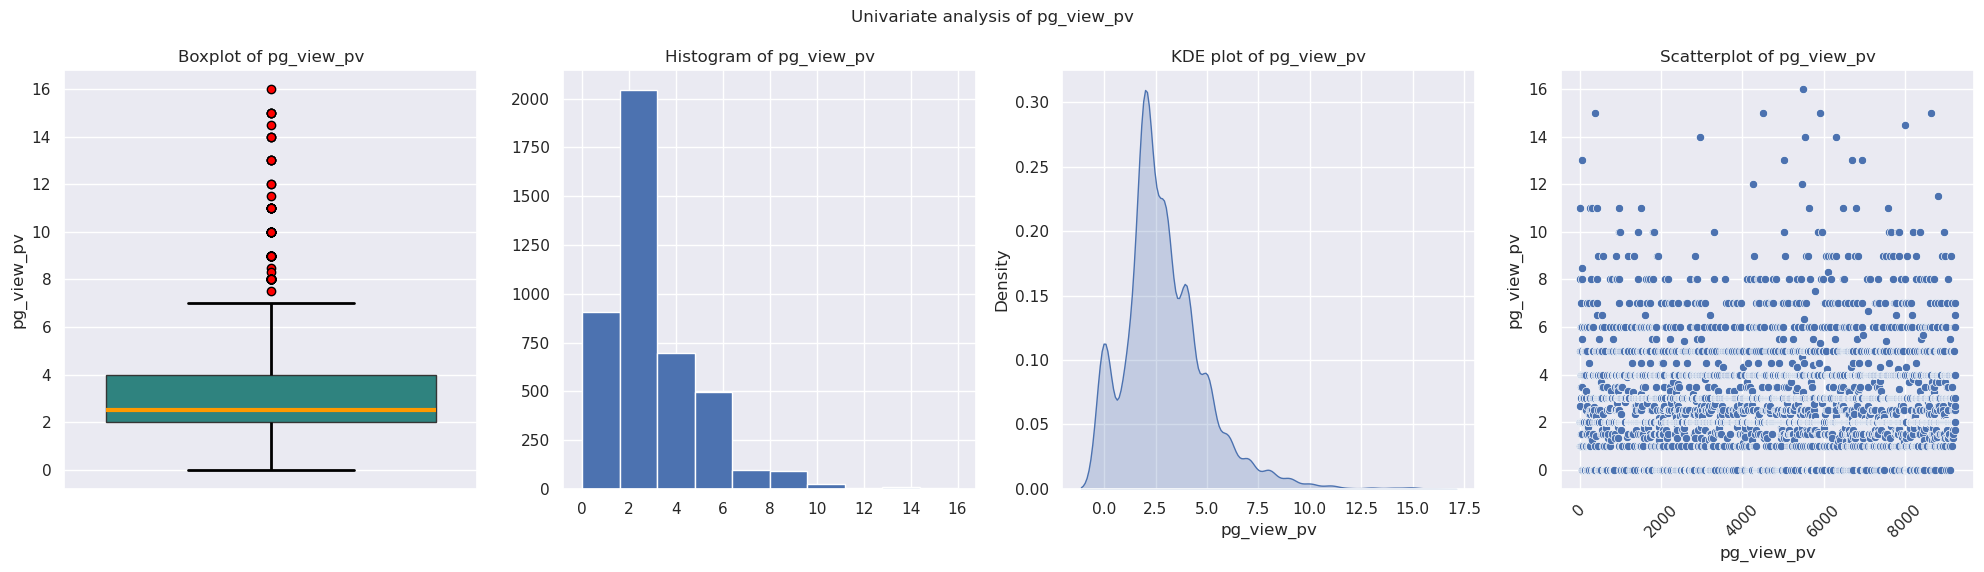

<Figure size 640x480 with 0 Axes>

In [23]:
univariate_plots(dff, dff.select_dtypes(include=[int,float]).columns, ftype='non_categorical',target='converted')

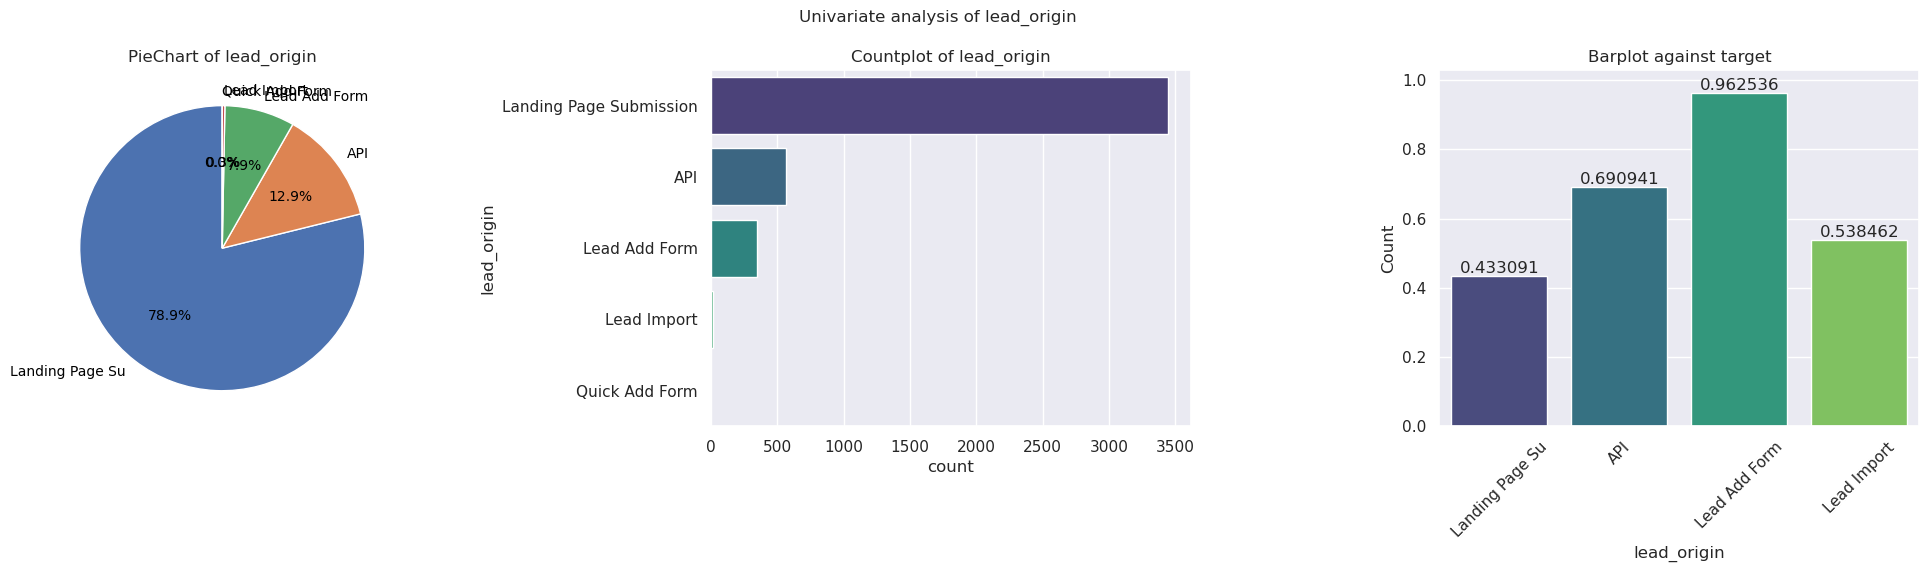

<Figure size 640x480 with 0 Axes>

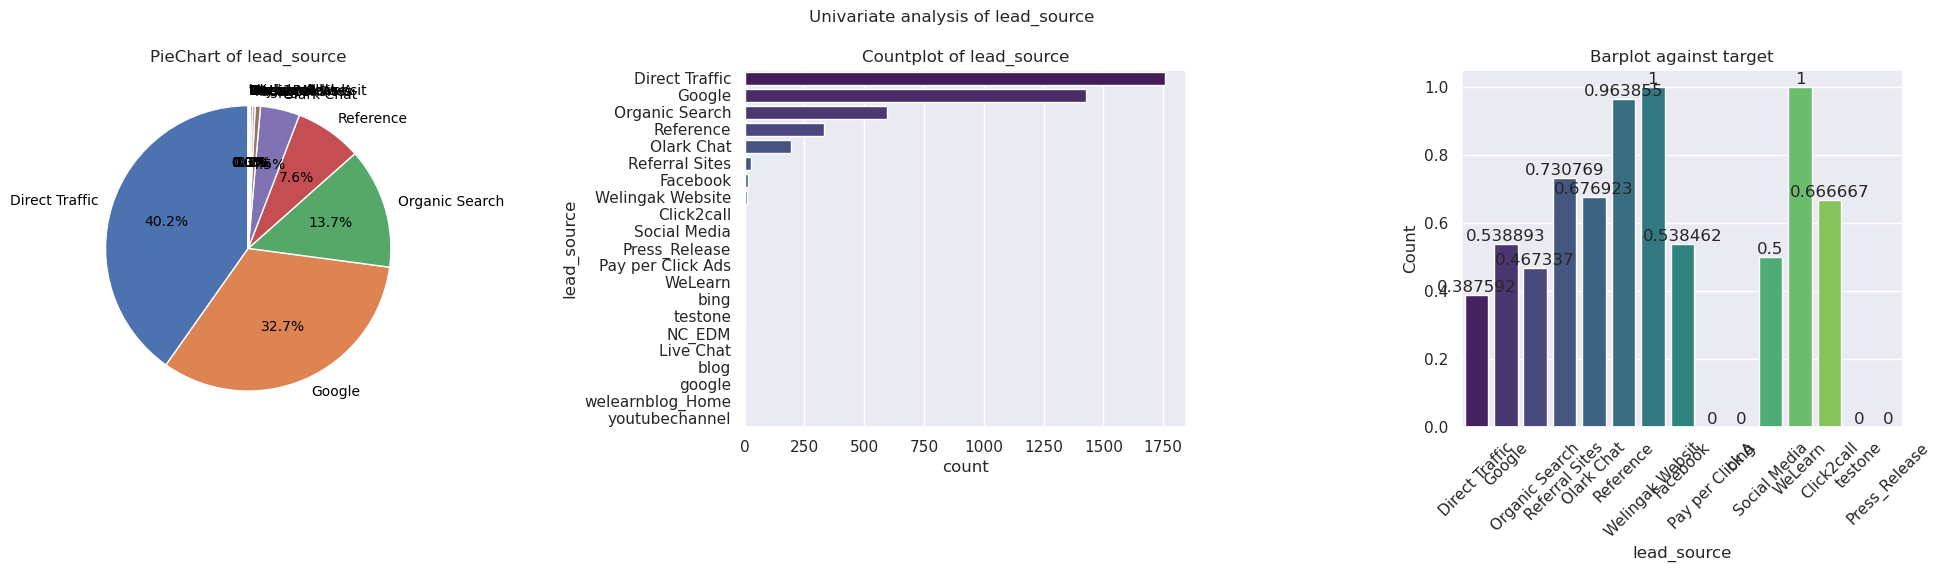

<Figure size 640x480 with 0 Axes>

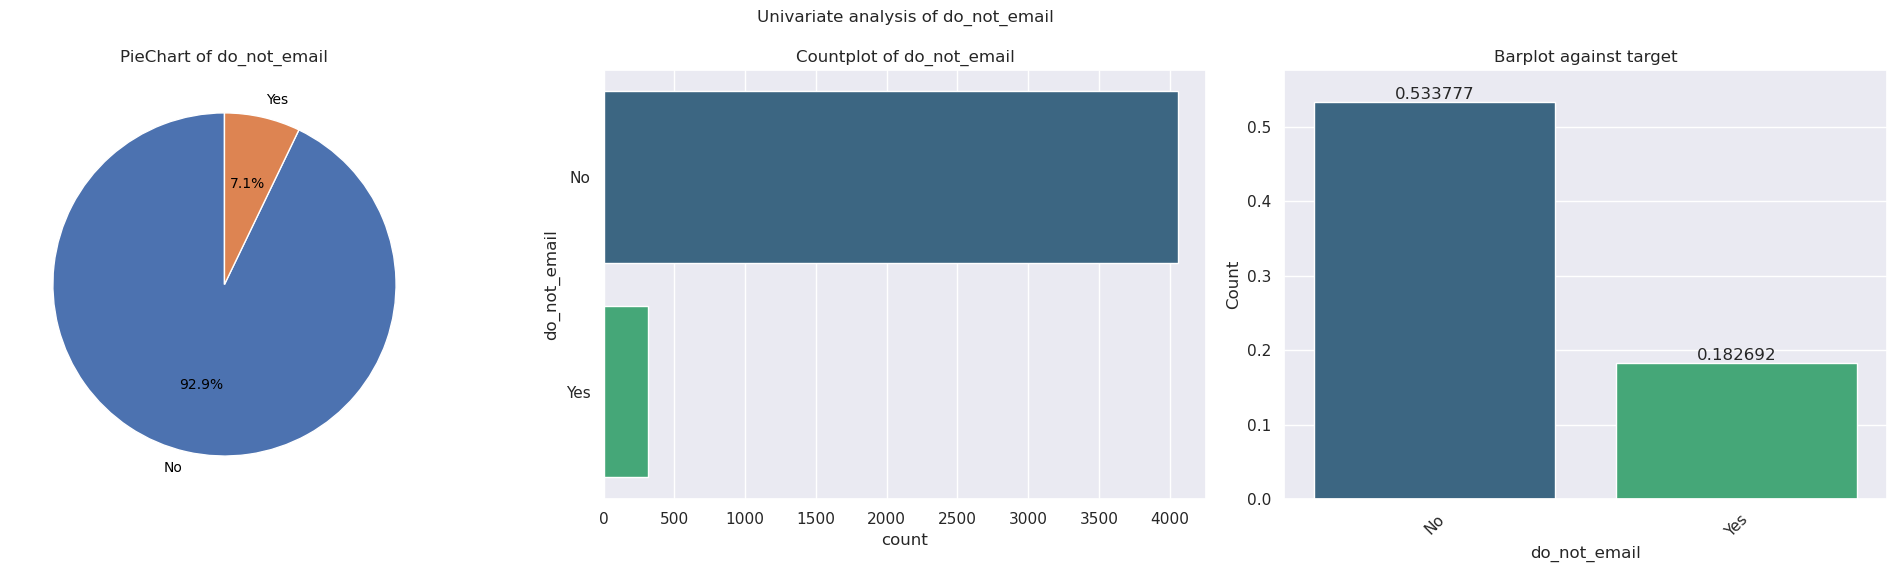

<Figure size 640x480 with 0 Axes>

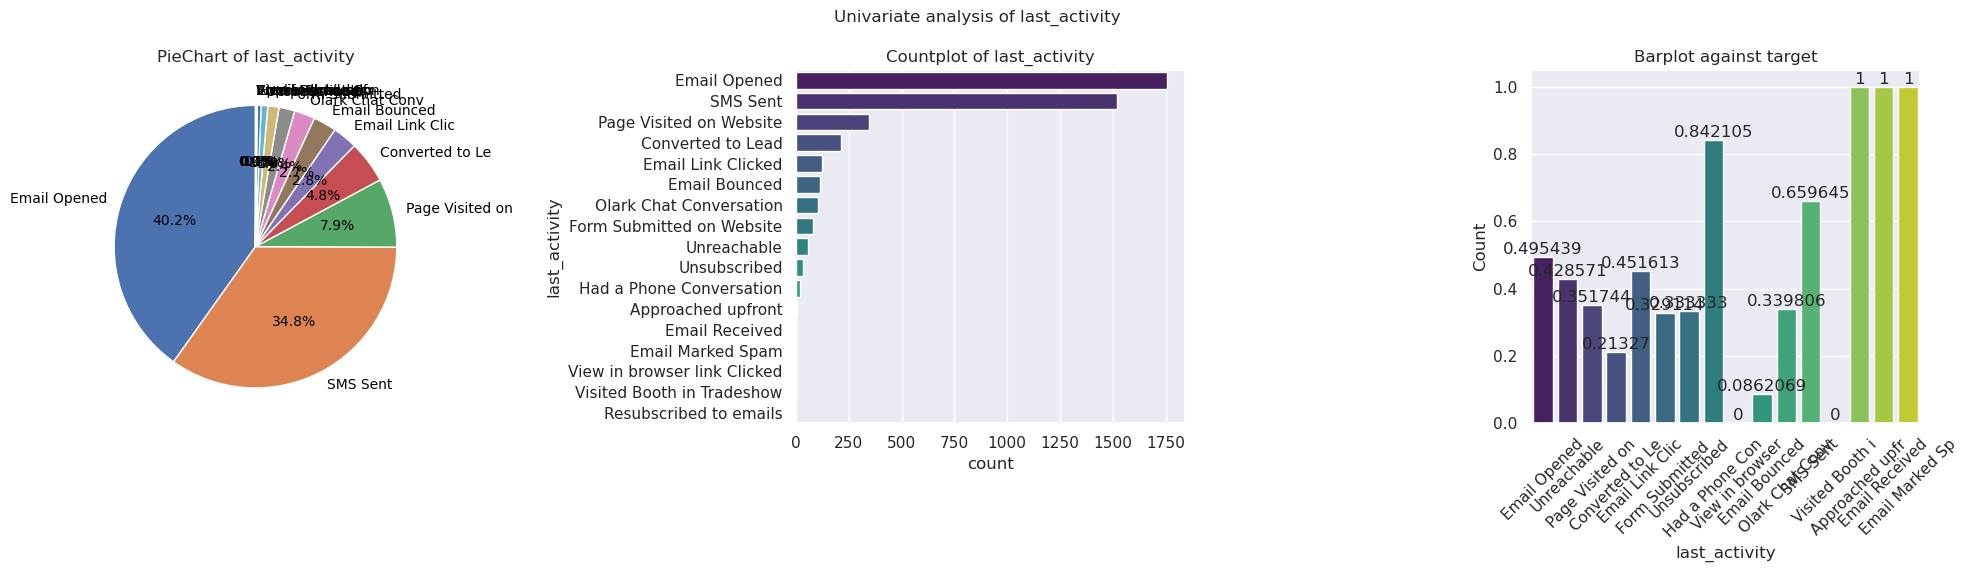

<Figure size 640x480 with 0 Axes>

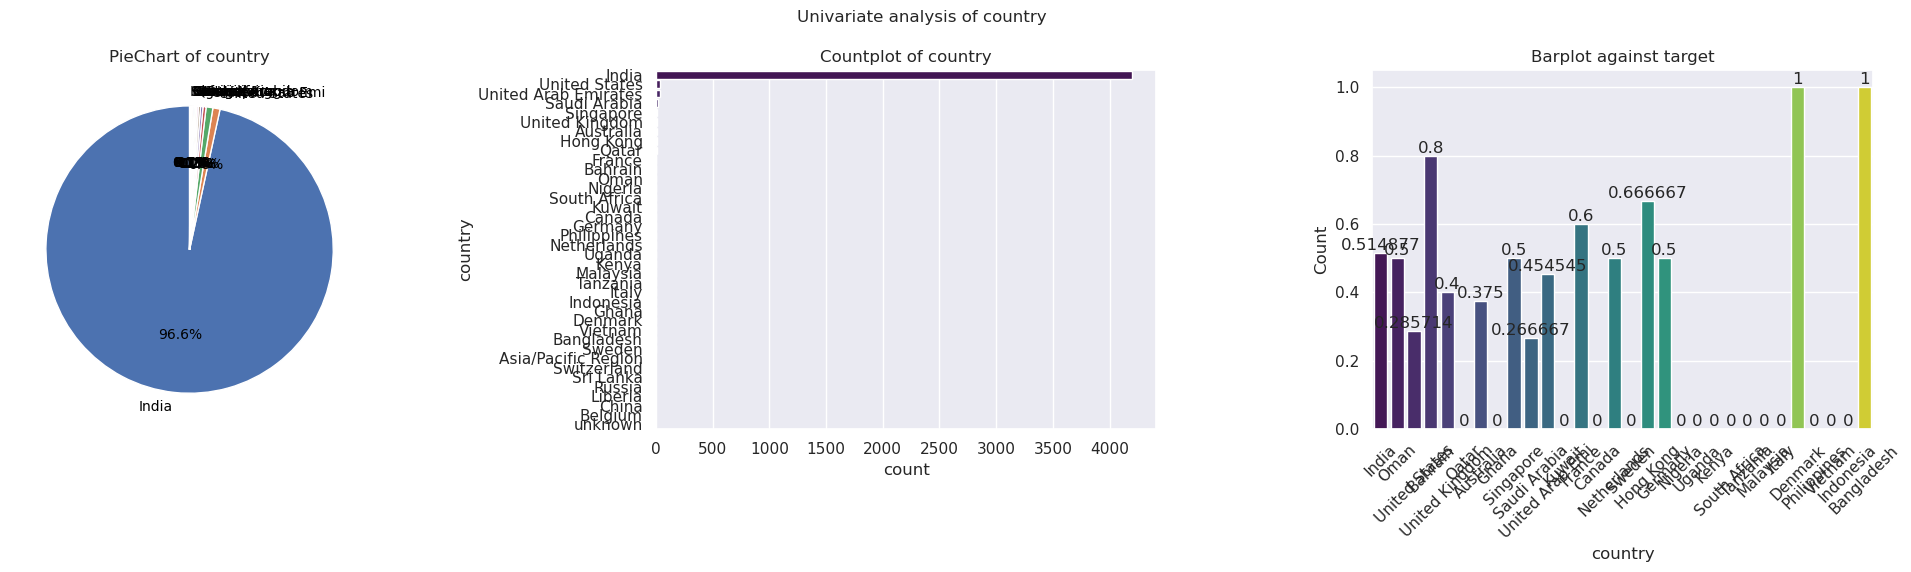

<Figure size 640x480 with 0 Axes>

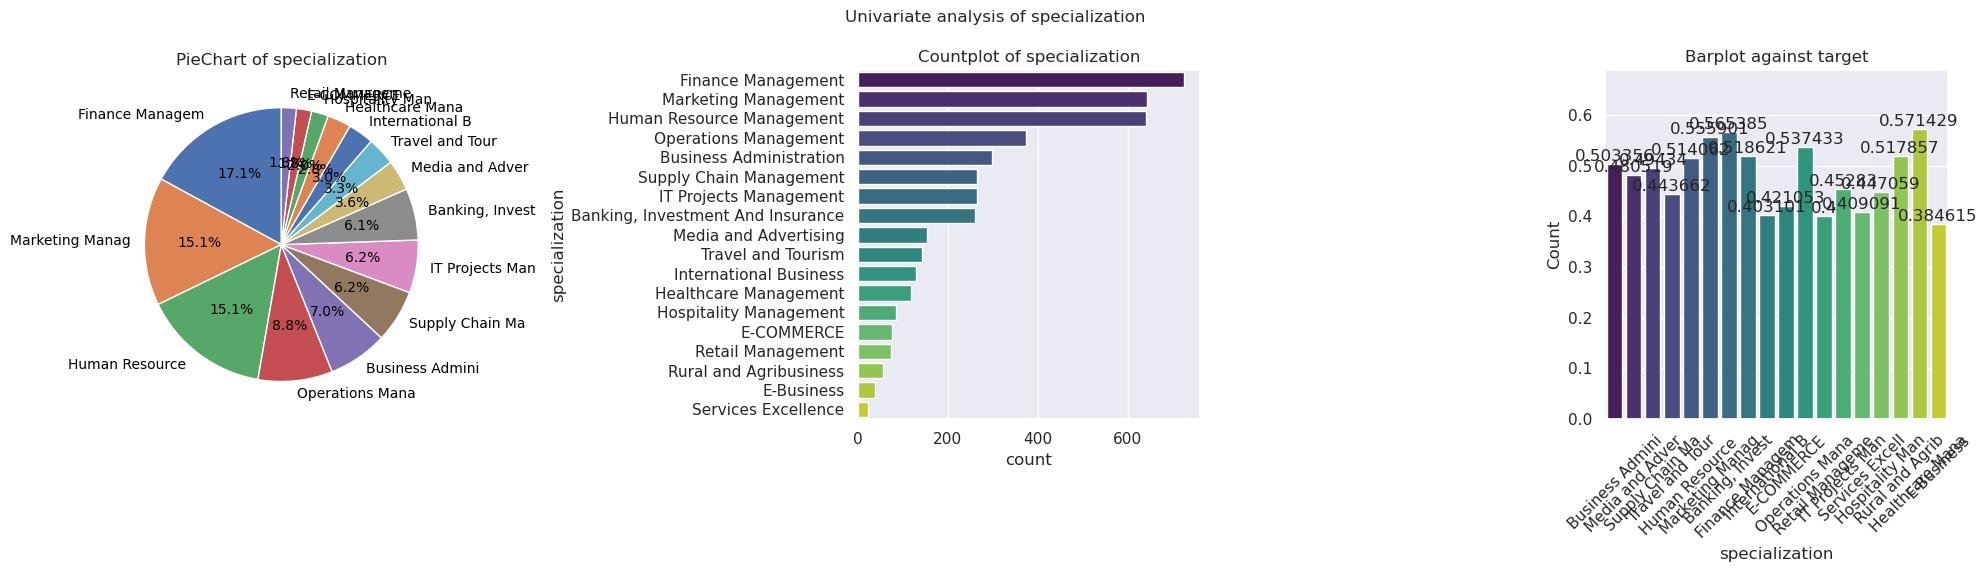

<Figure size 640x480 with 0 Axes>

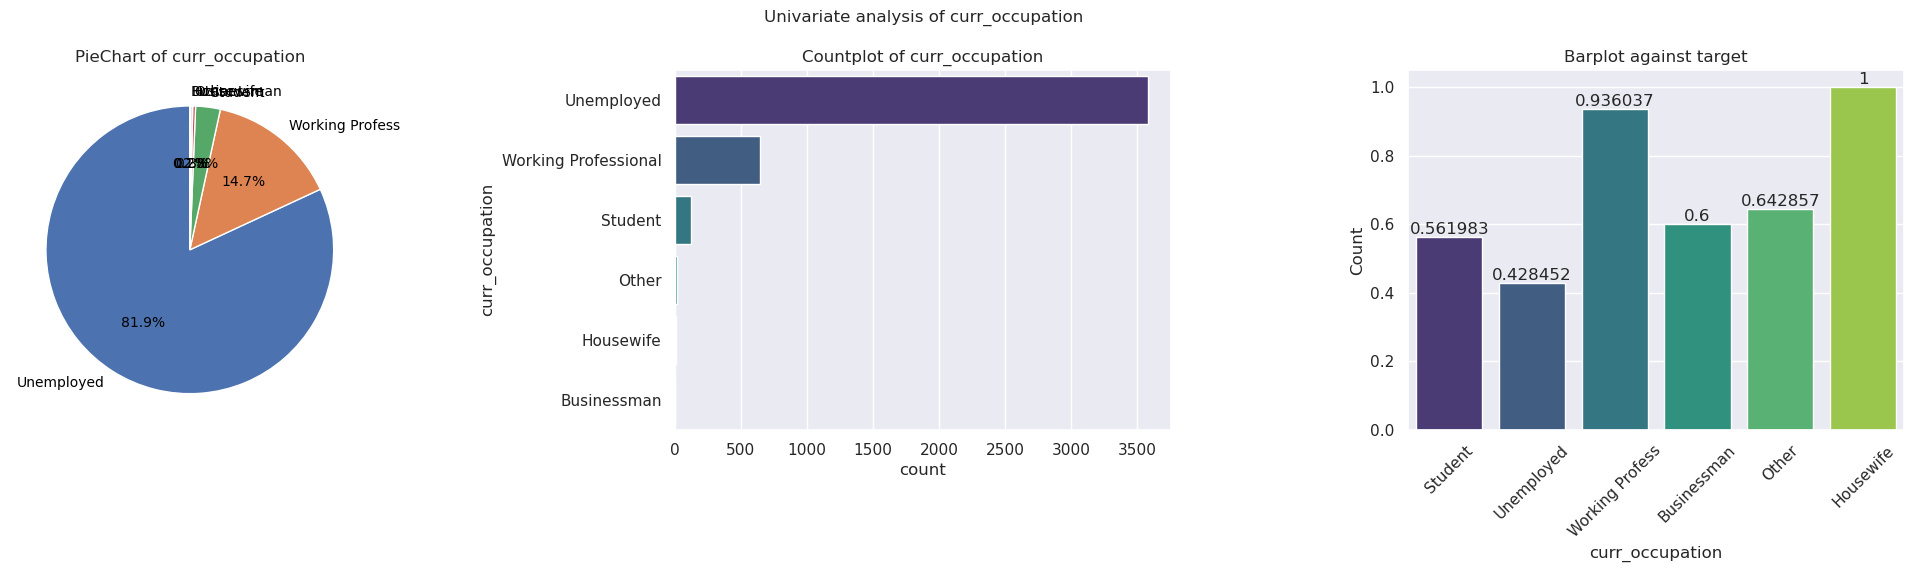

<Figure size 640x480 with 0 Axes>

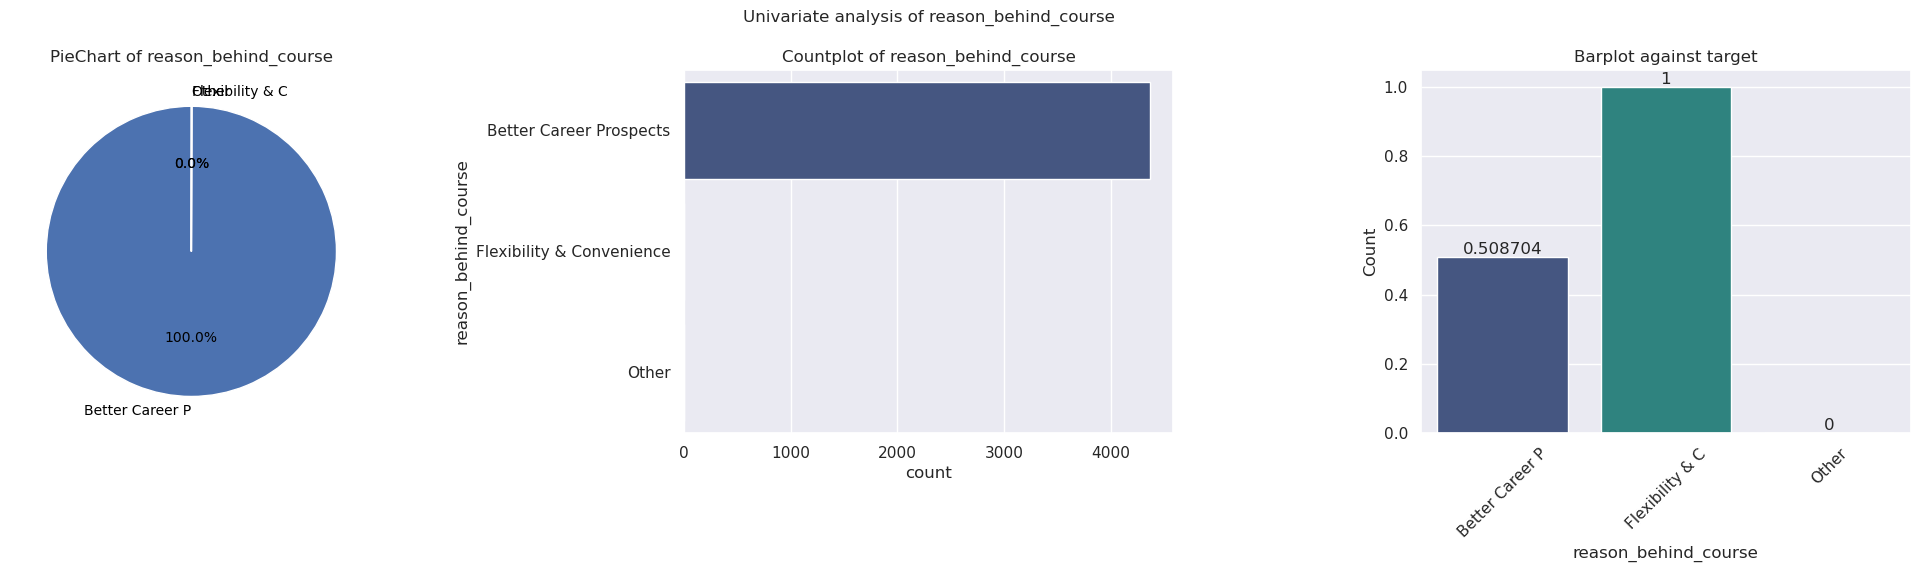

<Figure size 640x480 with 0 Axes>

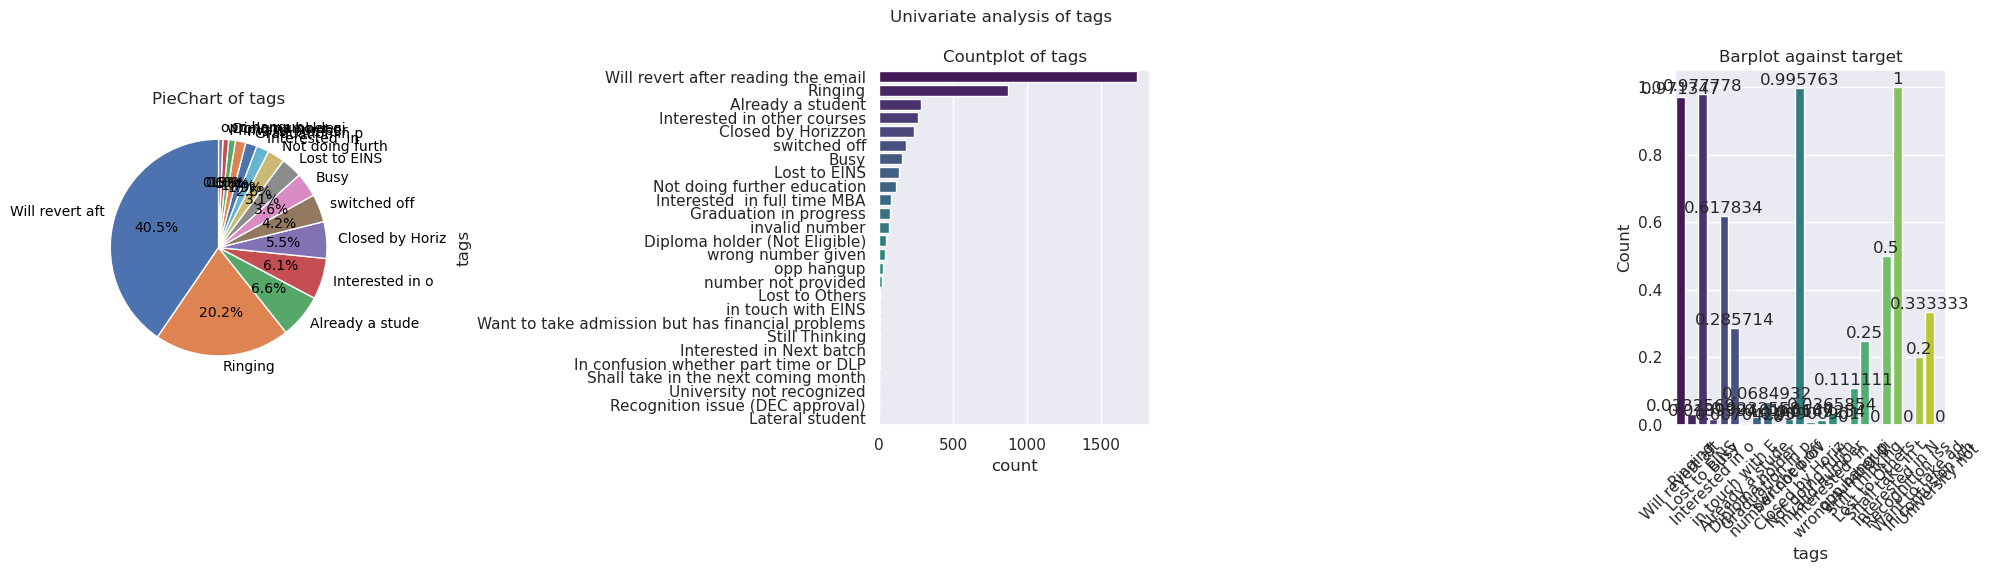

<Figure size 640x480 with 0 Axes>

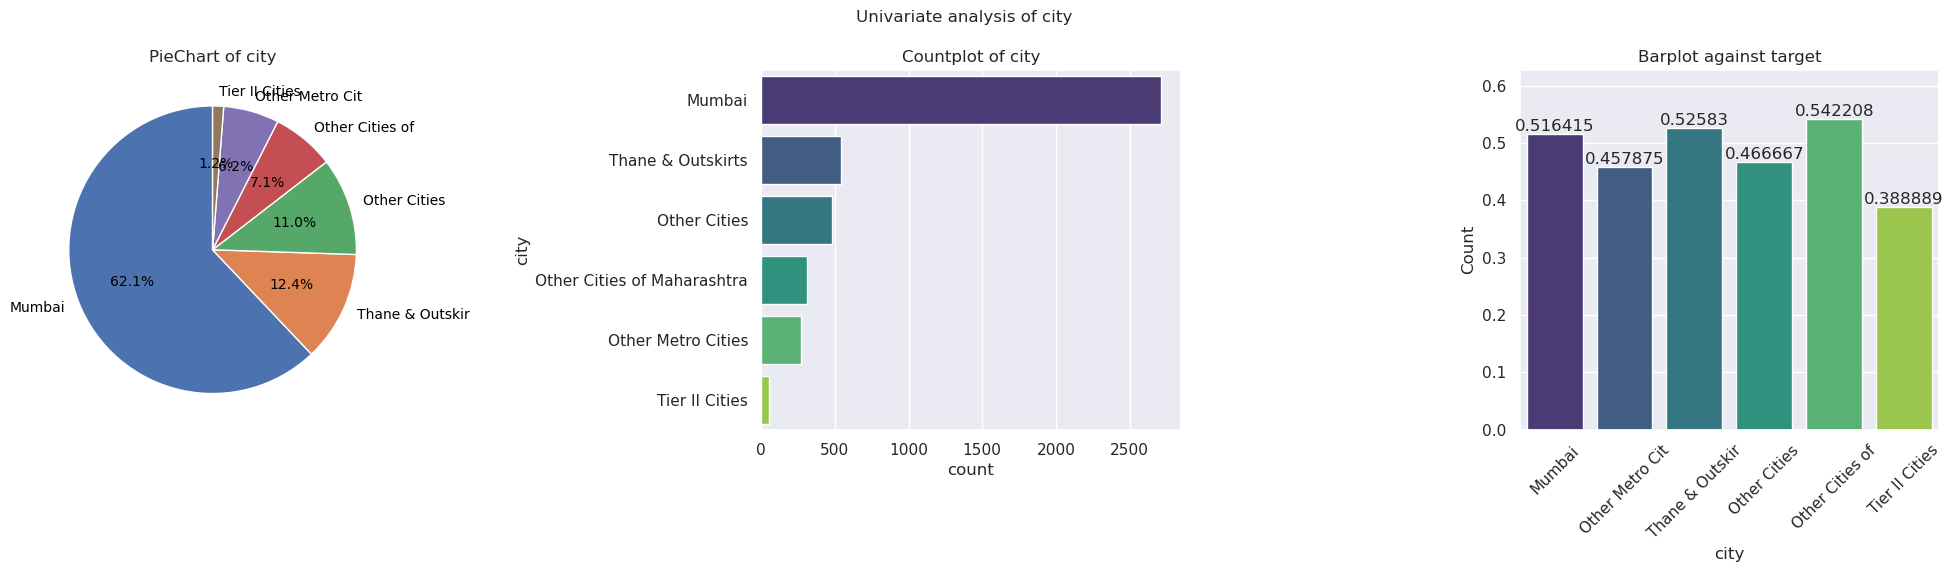

<Figure size 640x480 with 0 Axes>

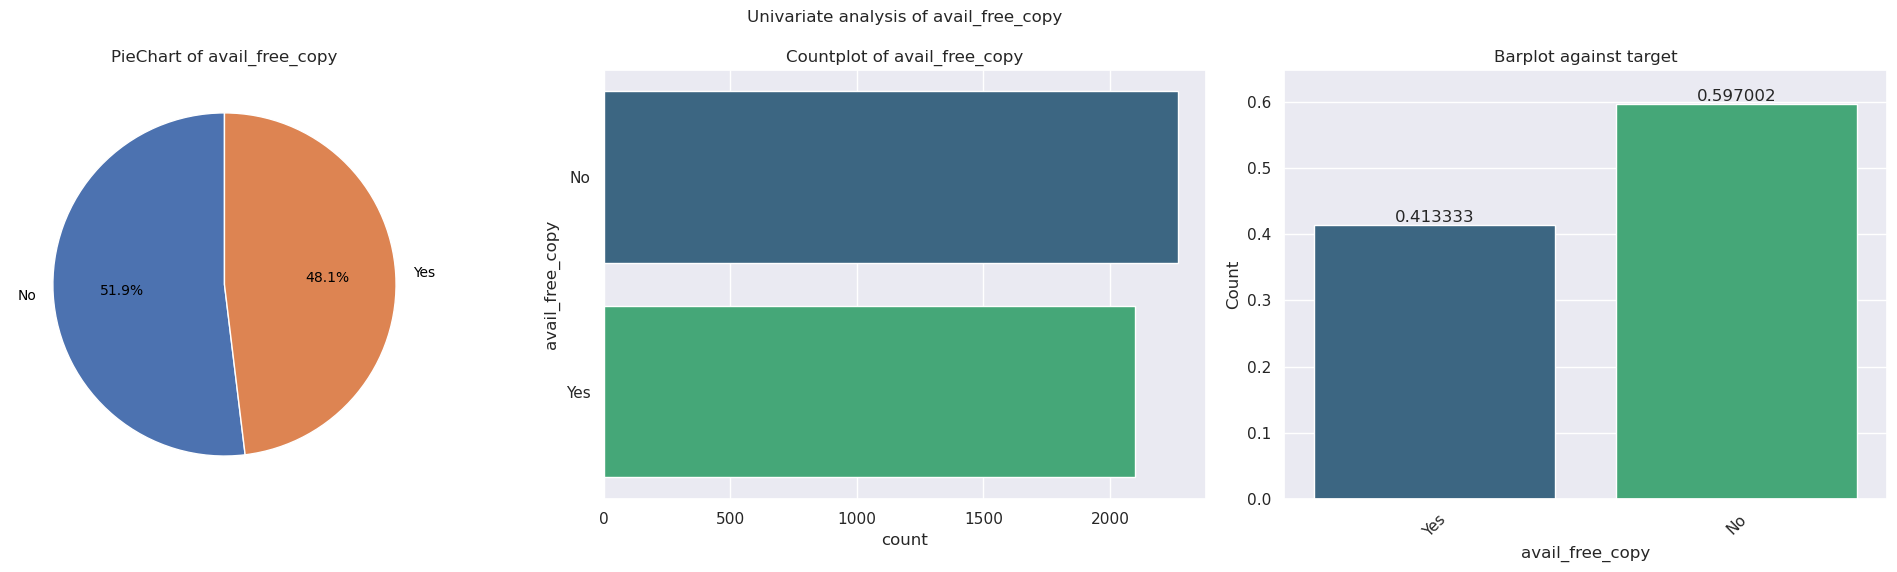

<Figure size 640x480 with 0 Axes>

In [24]:
univariate_plots(dff, dff.select_dtypes(exclude=[int,float]).columns, ftype='categorical',target='converted')

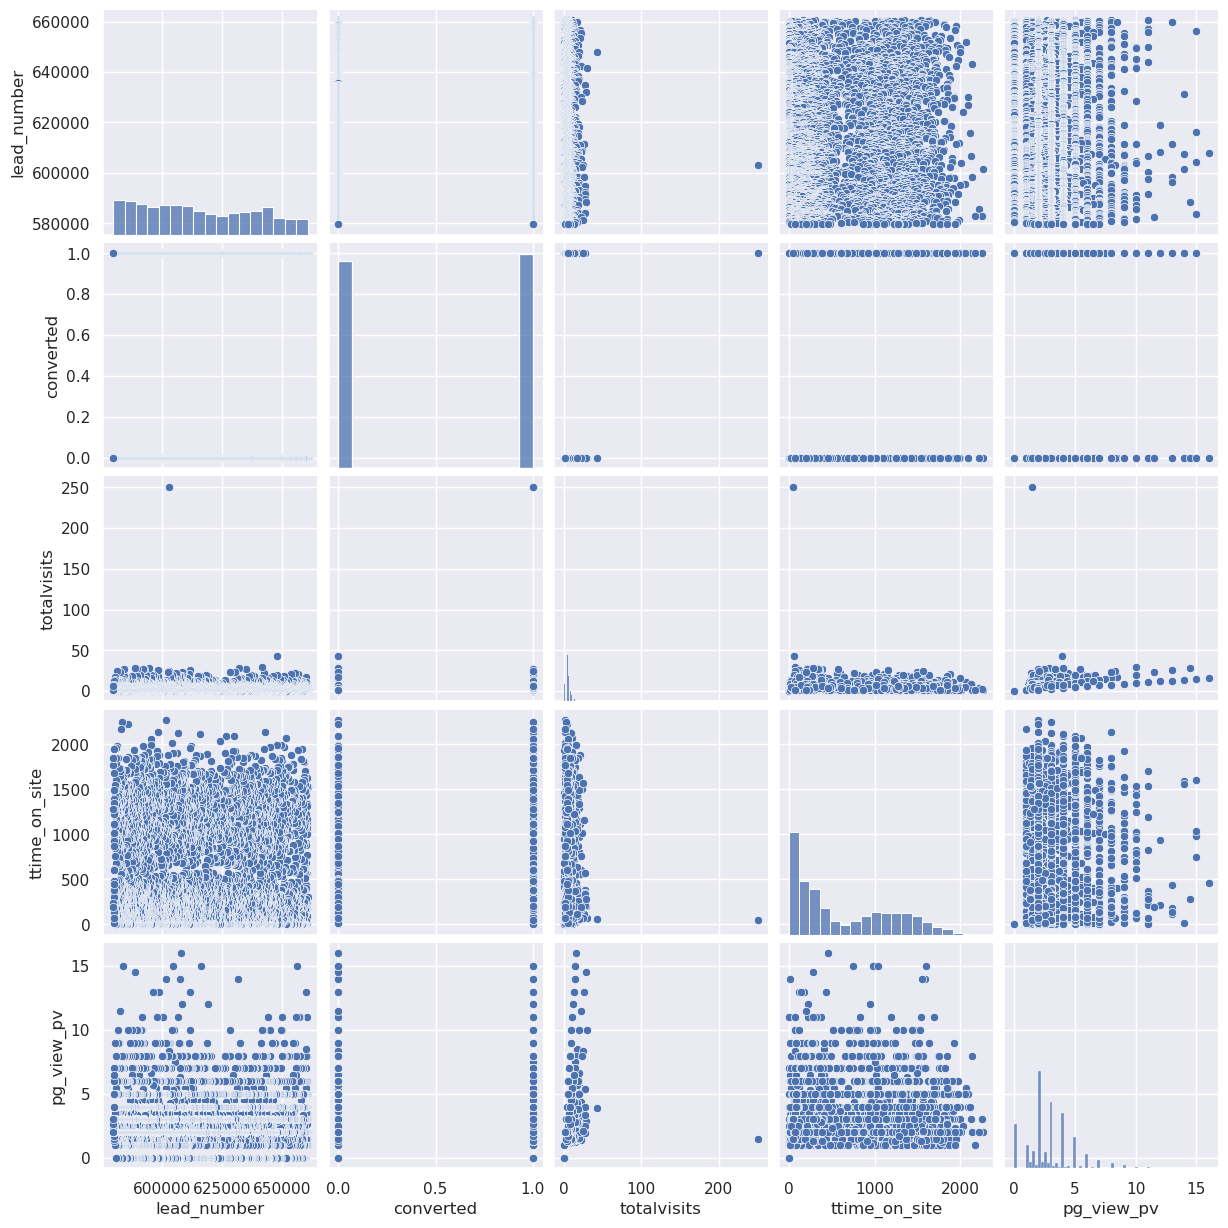

In [25]:
sns.pairplot(dff)

<Figure size 2000x1000 with 0 Axes>

<Axes: >

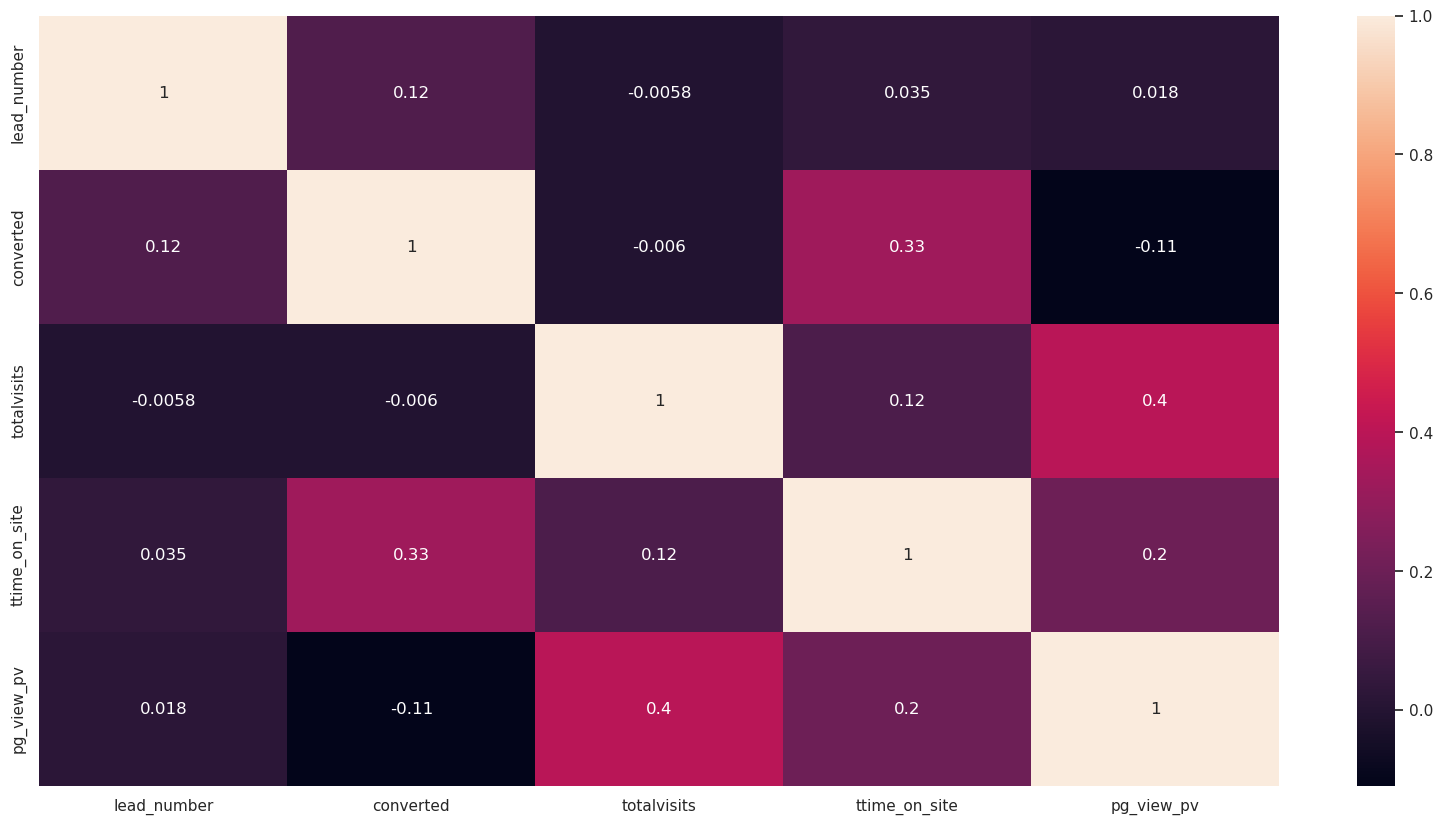

In [26]:
plt.figure(figsize = (20,10))# Size of the figure
sns.heatmap(dff.select_dtypes(exclude='category').corr(),annot = True)
plt.show()

#### Dummy Encoding

In [28]:
cols = dff.select_dtypes(exclude=[int,float]).columns
cols = list(set(list(cols)) - set(['prospect_id']))
dff = pd.get_dummies(dff, columns=cols, drop_first=True, dtype=float)

In [29]:
dff.head(2)

,lead_number,converted,totalvisits,ttime_on_site,pg_view_pv,last_activity_Converted to Lead,last_activity_Email Bounced,last_activity_Email Link Clicked,last_activity_Email Marked Spam,last_activity_Email Opened,last_activity_Email Received,last_activity_Form Submitted on Website,last_activity_Had a Phone Conversation,last_activity_Olark Chat Conversation,last_activity_Page Visited on Website,last_activity_Resubscribed to emails,last_activity_SMS Sent,last_activity_Unreachable,last_activity_Unsubscribed,last_activity_View in browser link Clicked,last_activity_Visited Booth in Tradeshow,specialization_Business Administration,specialization_E-Business,specialization_E-COMMERCE,specialization_Finance Management,specialization_Healthcare Management,specialization_Hospitality Management,specialization_Human Resource Management,specialization_IT Projects Management,specialization_International Business,specialization_Marketing Management,specialization_Media and Advertising,specialization_Operations Management,specialization_Retail Management,specialization_Rural and Agribusiness,specialization_Services Excellence,specialization_Supply Chain Management,specialization_Travel and Tourism,curr_occupation_Housewife,curr_occupation_Other,curr_occupation_Student,curr_occupation_Unemployed,curr_occupation_Working Professional,lead_origin_Landing Page Submission,lead_origin_Lead Add Form,lead_origin_Lead Import,lead_origin_Quick Add Form,do_not_email_Yes,tags_Busy,tags_Closed by Horizzon,tags_Diploma holder (Not Eligible),tags_Graduation in progress,tags_In confusion whether part time or DLP,tags_Interested in full time MBA,tags_Interested in Next batch,tags_Interested in other courses,tags_Lateral student,tags_Lost to EINS,tags_Lost to Others,tags_Not doing further education,tags_Recognition issue (DEC approval),tags_Ringing,tags_Shall take in the next coming month,tags_Still Thinking,tags_University not recognized,tags_Want to take admission but has financial problems,tags_Will revert after reading the email,tags_in touch with EINS,tags_invalid number,tags_number not provided,tags_opp hangup,tags_switched off,tags_wrong number given,city_Other Cities,city_Other Cities of Maharashtra,city_Other Metro Cities,city_Thane & Outskirts,city_Tier II Cities,avail_free_copy_Yes,lead_source_Direct Traffic,lead_source_Facebook,lead_source_Google,lead_source_Live Chat,lead_source_NC_EDM,lead_source_Olark Chat,lead_source_Organic Search,lead_source_Pay per Click Ads,lead_source_Press_Release,lead_source_Reference,lead_source_Referral Sites,lead_source_Social Media,lead_source_WeLearn,lead_source_Welingak Website,lead_source_bing,lead_source_blog,lead_source_google,lead_source_testone,lead_source_welearnblog_Home,lead_source_youtubechannel,reason_behind_course_Flexibility & Convenience,reason_behind_course_Other,country_Australia,country_Bahrain,country_Bangladesh,country_Belgium,country_Canada,country_China,country_Denmark,country_France,country_Germany,country_Ghana,country_Hong Kong,country_India,country_Indonesia,country_Italy,country_Kenya,country_Kuwait,country_Liberia,country_Malaysia,country_Netherlands,country_Nigeria,country_Oman,country_Philippines,country_Qatar,country_Russia,country_Saudi Arabia,country_Singapore,country_South Africa,country_Sri Lanka,country_Sweden,country_Switzerland,country_Tanzania,country_Uganda,country_United Arab Emirates,country_United Kingdom,country_United States,country_Vietnam,country_unknown
2,660727.000,1.000,2.000,1532.000,2.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0

#### Model Training

In [30]:
import statsmodels.api as sm 
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, recall_score,precision_score, roc_auc_score, confusion_matrix, f1_score, roc_curve, precision_recall_curve

In [31]:
X = dff.drop(['converted'],axis=1)
y = dff['converted']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)

In [33]:
to_scale = ['lead_number', 'totalvisits', 'ttime_on_site', 'pg_view_pv']

scaler = StandardScaler()
X_train[to_scale] = scaler.fit_transform(X_train[to_scale],y_train)
X_train.head()

,lead_number,totalvisits,ttime_on_site,pg_view_pv,last_activity_Converted to Lead,last_activity_Email Bounced,last_activity_Email Link Clicked,last_activity_Email Marked Spam,last_activity_Email Opened,last_activity_Email Received,last_activity_Form Submitted on Website,last_activity_Had a Phone Conversation,last_activity_Olark Chat Conversation,last_activity_Page Visited on Website,last_activity_Resubscribed to emails,last_activity_SMS Sent,last_activity_Unreachable,last_activity_Unsubscribed,last_activity_View in browser link Clicked,last_activity_Visited Booth in Tradeshow,specialization_Business Administration,specialization_E-Business,specialization_E-COMMERCE,specialization_Finance Management,specialization_Healthcare Management,specialization_Hospitality Management,specialization_Human Resource Management,specialization_IT Projects Management,specialization_International Business,specialization_Marketing Management,specialization_Media and Advertising,specialization_Operations Management,specialization_Retail Management,specialization_Rural and Agribusiness,specialization_Services Excellence,specialization_Supply Chain Management,specialization_Travel and Tourism,curr_occupation_Housewife,curr_occupation_Other,curr_occupation_Student,curr_occupation_Unemployed,curr_occupation_Working Professional,lead_origin_Landing Page Submission,lead_origin_Lead Add Form,lead_origin_Lead Import,lead_origin_Quick Add Form,do_not_email_Yes,tags_Busy,tags_Closed by Horizzon,tags_Diploma holder (Not Eligible),tags_Graduation in progress,tags_In confusion whether part time or DLP,tags_Interested in full time MBA,tags_Interested in Next batch,tags_Interested in other courses,tags_Lateral student,tags_Lost to EINS,tags_Lost to Others,tags_Not doing further education,tags_Recognition issue (DEC approval),tags_Ringing,tags_Shall take in the next coming month,tags_Still Thinking,tags_University not recognized,tags_Want to take admission but has financial problems,tags_Will revert after reading the email,tags_in touch with EINS,tags_invalid number,tags_number not provided,tags_opp hangup,tags_switched off,tags_wrong number given,city_Other Cities,city_Other Cities of Maharashtra,city_Other Metro Cities,city_Thane & Outskirts,city_Tier II Cities,avail_free_copy_Yes,lead_source_Direct Traffic,lead_source_Facebook,lead_source_Google,lead_source_Live Chat,lead_source_NC_EDM,lead_source_Olark Chat,lead_source_Organic Search,lead_source_Pay per Click Ads,lead_source_Press_Release,lead_source_Reference,lead_source_Referral Sites,lead_source_Social Media,lead_source_WeLearn,lead_source_Welingak Website,lead_source_bing,lead_source_blog,lead_source_google,lead_source_testone,lead_source_welearnblog_Home,lead_source_youtubechannel,reason_behind_course_Flexibility & Convenience,reason_behind_course_Other,country_Australia,country_Bahrain,country_Bangladesh,country_Belgium,country_Canada,country_China,country_Denmark,country_France,country_Germany,country_Ghana,country_Hong Kong,country_India,country_Indonesia,country_Italy,country_Kenya,country_Kuwait,country_Liberia,country_Malaysia,country_Netherlands,country_Nigeria,country_Oman,country_Philippines,country_Qatar,country_Russia,country_Saudi Arabia,country_Singapore,country_South Africa,country_Sri Lanka,country_Sweden,country_Switzerland,country_Tanzania,country_Uganda,country_United Arab Emirates,country_United Kingdom,country_United States,country_Vietnam,country_unknown
1559,1.241,-0.402,0.360,-0.953,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.00

In [34]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 3494
Model:                            GLM   Df Residuals:                     3378
Model Family:                Binomial   Df Model:                          115
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Fri, 11 Oct 2024   Deviance:                       17408.
Time:                        15:30:14   Pearson chi2:                 8.51e+17
No. Iterations:                    59   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                  -4.729e+15   9.56e+07  -4.95e+07      0.000   -4.73e+15   -4.73e+15
lead_number                                             5.157e+13   1.23e+06    4.2e+07      0.000    5.16e+13    5.16e+13
totalvisits                                             1.625e+14   1.26e+06   1.29e+08      0.000    1.62e+14    1.62e+14
ttime_on_site                                           2.636e+14   1.35e+06   1.95e+08      0.000    2.64e+14    2.64e+14
pg_view_pv                                             -3.375e+13    1.5e+06  -2.26e+07      0.000   -3.38e+13   -3.38e+13
last_activity_Converted to Lead                         -2.88e+15   4.82e+07  -5.97e+07      0.000   -2.88e+15   -2.88e+15
last_activity_Email Bounced                            -2.764e+15   4.88e+07  -5.67e+07      0.000   -2.76e+15   -2.76e+15
last_activity_Email Link Clicked                       -2.773e+15   4.83e+07  -5.74e+07      0.000   -2.77e+15   -2.77e+15
last_activity_Email Marked Spam                         1.278e+15   6.89e+07   1.85e+07      0.000    1.28e+15    1.28e+15
last_activity_Email Opened                             -2.899e+15   4.79e+07  -6.05e+07      0.000    -2.9e+15    -2.9e+15
last_activity_Email Received                            8.548e+14   8.27e+07   1.03e+07      0.000    8.55e+14    8.55e+14
last_activity_Form Submitted on Website                -3.036e+15   4.87e+07  -6.23e+07      0.000   -3.04e+15   -3.04e+15
last_activity_Had a Phone Conversation                 -2.895e+15    5.1e+07  -5.67e+07      0.000   -2.89e+15   -2.89e+15
last_activity_Olark Chat Conversation                  -3.243e+15   4.85e+07  -6.69e+07      0.000   -3.24e+15   -3.24e+15
last_activity_Page Visited on Website                   -3.02e+15   4.81e+07  -6.28e+07      0.000   -3.02e+15   -3.02e+15
last_activity_Resubscribed to emails                     -15.0503   1.46e-06  -1.03e+07      0.000     -15.050     -15.050
last_activity_SMS Sent                                 -2.516e+15    4.8e+07  -5.24e+07      0.000   -2.52e+15   -2.52e+15
last_activity_Unreachable                              -2.674e+15    4.9e+07  -5.46e+07      0.000   -2.67e+15   -2.67e+15
last_activity_Unsubscribed                             -2.545e+15   4.99e+07   -5.1e+07      0.000   -2.55e+15   -2.55e+15
last_activity_View in browser link Clicked             -6.044e+15   6.78e+07  -8.91e+07      0.000   -6.04e+15   -6.04e+15
last_activity_Visited Booth in Tradeshow               -4.253e+15   8.35e+07  -5.09e+07      0.000   -4.25e+15   -4.25e+15
specialization_Business Administration                 -7.634e+13   6.45e+06  -1.18e+07      0.000   -7.63e+13   -7.63e+13
speciali

In [35]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [36]:
from sklearn.feature_selection import RFE
rfe = RFE(estimator=logreg, n_features_to_select=15)             # running RFE with 13 variables as output
rfe = rfe.fit(X_train, y_train)

In [37]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('lead_number', False, 35),
 ('totalvisits', False, 16),
 ('ttime_on_site', False, 5),
 ('pg_view_pv', False, 51),
 ('last_activity_Converted to Lead', False, 50),
 ('last_activity_Email Bounced', False, 28),
 ('last_activity_Email Link Clicked', False, 26),
 ('last_activity_Email Marked Spam', False, 56),
 ('last_activity_Email Opened', False, 60),
 ('last_activity_Email Received', False, 86),
 ('last_activity_Form Submitted on Website', False, 48),
 ('last_activity_Had a Phone Conversation', False, 34),
 ('last_activity_Olark Chat Conversation', False, 2),
 ('last_activity_Page Visited on Website', False, 15),
 ('last_activity_Resubscribed to emails', False, 117),
 ('last_activity_SMS Sent', True, 1),
 ('last_activity_Unreachable', False, 87),
 ('last_activity_Unsubscribed', False, 52),
 ('last_activity_View in browser link Clicked', False, 66),
 ('last_activity_Visited Booth in Tradeshow', False, 90),
 ('specialization_Business Administration', False, 74),
 ('specialization_E-Busin

In [38]:
col = X_train.columns[rfe.support_]
X_train.columns[~rfe.support_]

Index(['lead_number', 'totalvisits', 'ttime_on_site', 'pg_view_pv',
       'last_activity_Converted to Lead', 'last_activity_Email Bounced',
       'last_activity_Email Link Clicked', 'last_activity_Email Marked Spam',
       'last_activity_Email Opened', 'last_activity_Email Received',
       ...
       'country_Sri Lanka', 'country_Sweden', 'country_Switzerland',
       'country_Tanzania', 'country_Uganda', 'country_United Arab Emirates',
       'country_United Kingdom', 'country_United States', 'country_Vietnam',
       'country_unknown'],
      dtype='object', length=122)

In [39]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 3494
Model:                            GLM   Df Residuals:                     3478
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -477.84
Date:                Fri, 11 Oct 2024   Deviance:                       955.68
Time:                        15:30:18   Pearson chi2:                 3.44e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.6713
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -3.4981      0.260    -13.445      0.000      -4.008      -2.988
last_activity_SMS Sent                       1.0892      0.207      5.263      0.000       0.684       1.495
curr_occupation_Working Professional         1.0744      0.409      2.629      0.009       0.273       1.875
tags_Busy                                    3.3370      0.323     10.322      0.000       2.703       3.971
tags_Closed by Horizzon                      8.5188      1.036      8.223      0.000       6.488      10.549
tags_Interested in Next batch               25.9750   4.59e+04      0.001      1.000   -8.99e+04    8.99e+04
tags_Interested in other courses            -0.7023      0.567     -1.238      0.216      -1.814       0.410
tags_Lost to EINS                            6.9419      0.640     10.845      0.000       5.687       8.197
tags_Not doing further education            -1.1492      1.038     -1.107      0.268      -3.184       0.886
tags_Ringing                                -0.5159      0.345     -1.494      0.135      -1.193       0.161
tags_Will revert after reading the email     6.3840      0.301     21.206      0.000       5.794       6.974
tags_in touch with EINS                      2.4012      0.890      2.699      0.007       0.657       4.145
tags_invalid number                         -0.9240      1.047     -0.882      0.378      -2.976       1.128
tags_switched off                           -1.0865      0.662     -1.641      0.101      -2.384       0.211
tags_wrong number given                    -20.7940   1.36e+04     -0.002      0.999   -2.67e+04    2.67e+04
country_Germany                              4.0413      1.507      2.682      0.007       1.087       6.995
============================================================================================================
"""

In [40]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1559   0.998
5532   0.009
6461   0.982
7316   0.947
5706   0.994
3103   0.717
7218   0.051
824    0.981
4441   0.029
2935   0.717
dtype: float64

In [41]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.99775122, 0.00949704, 0.98156909, 0.94714716, 0.99362835,
       0.7166938 , 0.05094162, 0.98129945, 0.02936713, 0.7166938 ])

In [42]:
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,Churn,Churn_Prob,CustID
0,1.000,0.998,1559
1,0.000,0.009,5532
2,1.000,0.982,6461
3,1.000,0.947,7316
4,1.000,0.994,5706


In [43]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,1.000,0.998,1559,1
1,0.000,0.009,5532,0
2,1.000,0.982,6461,1
3,1.000,0.947,7316,1
4,1.000,0.994,5706,1


In [44]:
# Confusion matrix 
confusion = confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

[[1656   73]
 [  78 1687]]


In [45]:
print(accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.9567830566685747


In [46]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,last_activity_SMS Sent,1.800
9,tags_Will revert after reading the email,1.790
1,curr_occupation_Working Professional,1.410
8,tags_Ringing,1.140
2,tags_Busy,1.070
3,tags_Closed by Horizzon,1.040
12,tags_switched off,1.040
13,tags_wrong number given,1.020
6,tags_Lost to EINS,1.010
11,tags_invalid number,1.010


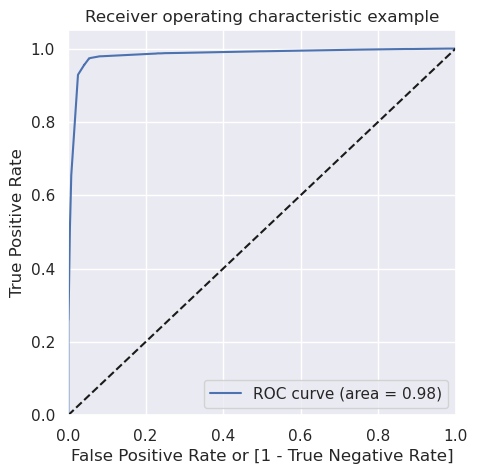

In [47]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = roc_curve( actual, probs, drop_intermediate = False )
    auc_score = roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    return None

fpr, tpr, thresholds = roc_curve( y_train_pred_final.Churn, y_train_pred_final.Churn_Prob, drop_intermediate = False )
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

In [48]:
precision_score(y_train_pred_final.Churn, y_train_pred_final.predicted)
recall_score(y_train_pred_final.Churn, y_train_pred_final.predicted)

0.9585227272727272

0.9558073654390935

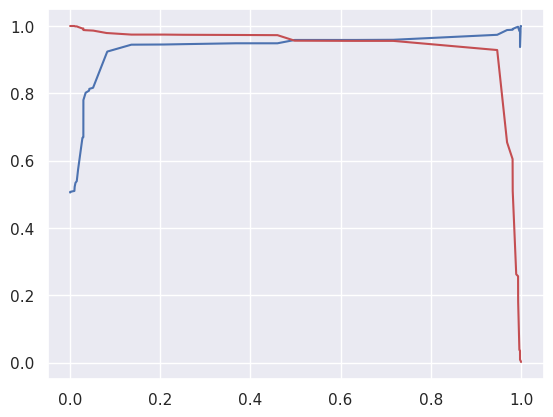

In [49]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)
plt.plot(thresholds, p[:-1], "b-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()